In [48]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [49]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    
    frame = TimeFrame(columns=init.index)
    frame.row[system.t0] = init
    
    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [50]:
def make_system():
    system = System(alpha = 0.05, 
                    beta = 0.1,
                    gamma = 0.1,
                    delta = 0.1,
                    t0 = 0, 
                    t_end = 1000)
    return system

In [51]:
system = make_system()
init = State(wolf = 1, elk = 1)

,values
wolf,1
elk,1


In [61]:
def update_func(state, t, system):
    
    """elk_gain = state.elk * system.alpha
    elk_loss = state.wolf * state.elk * system.beta
    wolf_gain = state.wolf * state.elk * system.delta
    wolf_loss = state.wolf * system.gamma
    
    wolf_change = wolf_gain - wolf_loss
    elk_change = elk_gain - elk_loss
    
    new_elk = state.elk + elk_change
    new_wolf = state.wolf + wolf_change
    
    out = State(elk = new_elk, wolf = new_wolf)
    
    """
    
    out = state
    out.elk += state.elk * system.alpha - state.wolf * state.elk * system.beta
    out.wolf += state.wolf * state.elk * system.delta - state.wolf * system.gamma
    
    return out

In [62]:
def plot_results(results):
    plot(results.elk, '--', label='Elk Population')
    plot(results.wolf, '-', label='Wolf Population')
    decorate(xlabel='Time (days)',
             ylabel='Population')

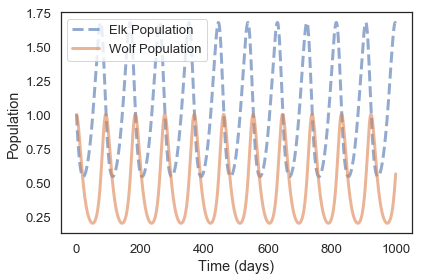

In [60]:
results = run_simulation(system, update_func)
plot_results(results)

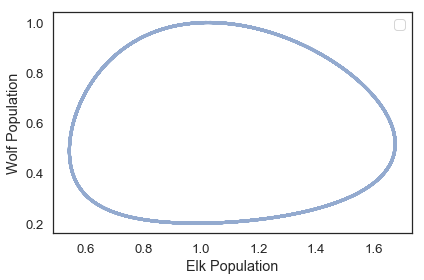

In [64]:
plot(results.elk, results.wolf)
decorate(xlabel = 'Elk Population', ylabel = 'Wolf Population')